In [1]:
import pandas as pd
from src.utils.timescaledb_ops import TimescaleDBOps

# Technical Analysis and Chart

In [2]:
tsdb_ops = TimescaleDBOps()
columns, data = tsdb_ops.read_data("silver.ohlc_daily")
# columns, data = tsdb_ops.read_data("silver.ohlc_weekly")
# columns, data = tsdb_ops.read_data("silver.ohlc_monthly")
df = pd.DataFrame(data=data, columns=columns)
df = df.sort_values("date").reset_index(drop=True)
df["date"] = pd.to_datetime(df["date"])

2025-06-24 21:30:07,817 - INFO - Data read from silver.ohlc_daily successfully.


In [22]:
df.head()

,date,pair,open,high,low,close,volume,count
0,2013-10-07,XXBTZUSD,122.00000,122.00000,122.00,122.00,15.0,0
1,2013-10-08,XXBTZUSD,122.00000,124.19000,122.00,124.18,34.0,20
2,2013-10-09,XXBTZUSD,124.19000,124.19000,123.84,123.84,51.0,50
3,2013-10-10,XXBTZUSD,124.01687,124.01687,123.84,123.84,72.0,66
4,2013-10-11,XXBTZUSD,124.01687,125.86000,123.84,125.86,55.0,53


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4279 non-null   datetime64[ns]
 1   pair    4279 non-null   object        
 2   open    4279 non-null   float64       
 3   high    4279 non-null   float64       
 4   low     4279 non-null   float64       
 5   close   4279 non-null   float64       
 6   volume  4279 non-null   float64       
 7   count   4279 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 267.6+ KB


In [24]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# def plot_ohlcv(df: pd.DataFrame, title: str = "OHLCV Chart"):
#     """
#     Plots OHLCV data using Plotly with candlestick and volume subplot.

#     Parameters:
#     - df (pd.DataFrame): DataFrame with ['date', 'open', 'high', 'low', 'close', 'volume']
#     - title (str): Title for the chart
#     """

#     # Validate required columns
#     required_cols = {'date', 'open', 'high', 'low', 'close', 'volume'}
#     if not required_cols.issubset(df.columns):
#         raise ValueError(f"DataFrame must contain columns: {required_cols}")

#     # Ensure datetime is in correct format
#     df['date'] = pd.to_datetime(df['date'])

#     # Create subplot with 2 rows (OHLC and Volume)
#     fig = make_subplots(rows=4, cols=1, 
#                         shared_xaxes=True, 
#                         vertical_spacing=0.02,
#                         row_heights=[0.55, 0.15, 0.15, 0.15],
#                         subplot_titles=(title, "Volume"))

#     # Add candlestick
#     fig.add_trace(go.Candlestick(
#         x=df['date'],
#         open=df['open'],
#         high=df['high'],
#         low=df['low'],
#         close=df['close'],
#         name="Price",
#         increasing_line_color='green',
#         decreasing_line_color='red'
#     ), row=1, col=1)

#     # Add volume bar chart
#     fig.add_trace(go.Bar(
#         x=df['date'],
#         y=df['volume'],
#         name="Volume",
#         title="Volume"
#         marker_color='orange'
#     ), row=2, col=1)

#     # Layout adjustments
#     fig.update_layout(
#         # title=title,
#         xaxis_rangeslider_visible=False,
#         template='plotly_dark',
#         height=1000,
#         margin=dict(l=50, r=25, t=50, b=40)
#     )
    
#     return fig

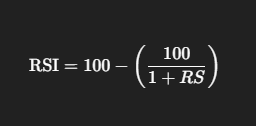

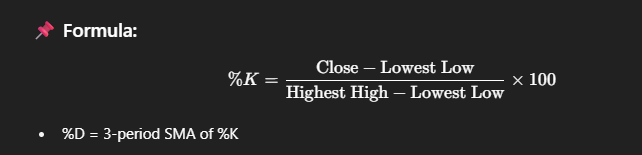

In [30]:
# Technical Analysis
# EMA
df['ema_13'] = df['close'].ewm(span=13, adjust=False).mean()
df['ema_21'] = df['close'].ewm(span=21, adjust=False).mean()

# # RSI
# window = 14 # default setting
# delta = df['close'].diff(1)
# avg_gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()  # avg_gain 
# avg_loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
# rsi = avg_gain / avg_loss
# df['rsi'] = 100 - (100 / (1 + rsi)) 

# Stochastic
perc_k_length = 5
perc_k_smoothing = 3
perc_d_length = 3

lowest_low = df['low'].rolling(perc_k_length).min()
highest_high = df['high'].rolling(perc_k_length).max()
df["stochastic_%K"] = ((df['close'] -lowest_low) / (highest_high -lowest_low)).rolling(perc_k_smoothing).mean() 
df["stochastic_%D"] =  df["stochastic_%K"].rolling(perc_d_length).mean()

# MACD
ema_12 = df['close'].ewm(span=12, adjust=False).mean()
ema_26 = df['close'].ewm(span=26, adjust=False).mean()

macd = ema_12 - ema_26
macd_signal_line = macd.ewm(span=9, adjust=False).mean()
macd_bar = macd - macd_signal_line

df['macd'] = macd
df['macd_signal_line'] = macd_signal_line
df['macd_bar'] = macd_bar

In [12]:
df[df['date'] >= '2025-05-01']

,date,pair,open,high,low,close,volume,count,ema_13,ema_21,stochastic_percentage_k,stochastic_percentage_d,macd,macd_signal_line,macd_bar
1947,2025-05-01,XXBTZUSD,95194.3,96332.0,92970.5,96209.5,32409.0,1596,92386.175399,90371.044909,0.847617,0.822733,3151.117114,2370.381022,780.736093
1948,2025-05-02,XXBTZUSD,96209.5,97407.8,95900.4,96970.5,32153.0,1234,93041.078914,90970.995372,0.882749,0.848867,3257.877345,2547.880286,709.997059
1949,2025-05-03,XXBTZUSD,96970.5,97885.0,95893.8,95939.9,27565.0,1050,93455.196212,91422.713974,0.823836,0.851401,3222.181488,2682.740527,539.440961
1950,2025-05-04,XXBTZUSD,95939.9,96521.4,95305.6,95440.1,18605.0,689,93738.753896,91787.930886,0.669905,0.792164,3117.624545,2769.717330,347.907215
1951,2025-05-05,XXBTZUSD,95440.1,95761.3,93570.1,94071.8,25761.0,936,93786.331911,91995.555351,0.443606,0.645782,2891.026091,2793.979083,97.047009
1952,2025-05-06,XXBTZUSD,94071.9,95173.9,93624.4,93728.2,25079.0,1136,93778.027352,92153.068501,0.254415,0.455975,2653.135837,2765.810434,-112.674596
1953,2025-05-07,XXBTZUSD,93728.2,97650.0,93398.5,97011.5,30304.0,1414,94239.952016,92594.744091,0.355346,0.351122,2698.435087,2752.335364,-53.900277
1954,2025-05-08,XXBTZUSD,97011.5,99823.4,95824.0,99435.9,39783.0,1795,94982.230299,93216.667356,0.593878,0.401213,2896.573986,2781.183089,115.390897
1955,2025-05-09,XXBTZUSD,99433.1,104319.1,99099.0,102976.7,48656.0,2539,96124.297399,94103.943051,0.874023,0.607749,3301.258605,2885.198192,416.060413
1956,2025-05-10,XXBTZUSD,102976.8,104013.0,102344.7,103430.8,26748.0,952,97168.083485,94951.839137,0.911807,0.793236,3616.922524,3031.543058,585.379466


In [6]:
df[df['date'] >= '2025-05-01']

,date,pair,open,high,low,close,volume,count,ema_13,ema_21,stochastic_percentage_k,stochastic_percentage_d,macd,macd_signal_line,macd_bar
0,2025-06-01,XXBTZUSD,103525.1,104933.2,103525.1,104117.3,18664.0,344,104117.300000,104117.300000,NaN,NaN,0.000000,0.000000,0.000000
1,2025-06-02,XXBTZUSD,104117.3,105910.6,103855.5,104058.0,20671.0,814,104108.828571,104111.909091,NaN,NaN,-4.730484,-0.946097,-3.784387
2,2025-06-03,XXBTZUSD,104058.1,106500.0,103737.7,105315.0,24103.0,865,104281.138776,104221.280992,NaN,NaN,91.890709,17.621264,74.269444
3,2025-06-04,XXBTZUSD,105315.0,106820.0,105127.5,105148.4,22810.0,680,104405.033236,104305.564538,NaN,NaN,153.253858,44.747783,108.506075
4,2025-06-05,XXBTZUSD,105148.4,105587.9,104279.0,104900.0,19479.0,618,104475.742774,104359.604125,NaN,NaN,179.768531,71.751933,108.016599
5,2025-06-06,XXBTZUSD,104900.0,105948.1,100400.0,104000.0,45868.0,1942,104407.779520,104326.912841,NaN,NaN,126.698620,82.741270,43.957350
6,2025-06-07,XXBTZUSD,104000.0,105385.3,103642.2,105167.5,25719.0,740,104516.311018,104403.329856,0.573543,NaN,176.809674,101.554951,75.254723
7,2025-06-08,XXBTZUSD,105167.6,105929.0,105082.3,105699.9,15441.0,479,104685.395158,104521.199869,0.709626,NaN,256.526202,132.549201,123.977001
8,2025-06-09,XXBTZUSD,105700.0,107828.7,105392.3,107738.4,21337.0,674,105121.538707,104813.672608,0.851992,0.711720,478.674179,201.774197,276.899983
9,2025-06-10,XXBTZUSD,107741.4,110550.0,106935.1,109556.1,37364.0,1382,105755.047463,105244.802371,0.905151,0.822256,792.268473,319.873052,472.395421


## Technical Analysis

In [ ]:
# Technical Analysis
# EMA
df['ema_13'] = df['close'].ewm(span=13, adjust=False).mean()
df['ema_21'] = df['close'].ewm(span=21, adjust=False).mean()

# Stochastic
window = 14 # default setting
perc_k_length = 5
perc_k_smoothing = 3
perc_d_length = 3

lowest_low = df['low'].rolling(window).min()
highest_high = df['high'].rolling(window).max()
df["stochastic_%K"] = ((df['close'] -lowest_low) / (highest_high -lowest_low)).rolling(perc_k_smoothing).mean() 
df["stochastic_%D"] =  df["stochastic_%K"].rolling(perc_d_length).mean()

# MACD
ema_12 = df['close'].ewm(span=12, adjust=False).mean()
ema_26 = df['close'].ewm(span=26, adjust=False).mean()

macd = ema_12 - ema_26
macd_signal_line = macd.ewm(span=9, adjust=False).mean()
macd_bar = macd - macd_signal_line

df['macd'] = macd
df['macd_signal_line'] = macd_signal_line
df['macd_bar'] = macd_bar

# LLM

In [3]:
tsdb_ops = TimescaleDBOps()
columns, data = tsdb_ops.read_data("gold.ohlc_ta_daily")
df = pd.DataFrame(data=data, columns=columns)
df = df.sort_values("date").reset_index(drop=True)
df["date"] = pd.to_datetime(df["date"])

2025-06-24 21:30:11,417 - INFO - Data read from gold.ohlc_ta_daily successfully.


In [4]:
df

,date,pair,open,high,low,close,volume,count,ema_13,ema_21,stochastic_percentage_k,stochastic_percentage_d,macd,macd_signal_line,macd_bar
0,2013-10-07,XXBTZUSD,122.00000,122.00000,122.00,122.00,15.0,0,122.000000,122.000000,NaN,NaN,0.000000,0.000000,0.000000
1,2013-10-08,XXBTZUSD,122.00000,124.19000,122.00,124.18,34.0,20,122.311429,122.198182,NaN,NaN,0.173903,0.034781,0.139123
2,2013-10-09,XXBTZUSD,124.19000,124.19000,123.84,123.84,51.0,50,122.529796,122.347438,NaN,NaN,0.281048,0.084034,0.197014
3,2013-10-10,XXBTZUSD,124.01687,124.01687,123.84,123.84,72.0,66,122.716968,122.483125,NaN,NaN,0.361790,0.139585,0.222205
4,2013-10-11,XXBTZUSD,124.01687,125.86000,123.84,125.86,55.0,53,123.165973,122.790114,NaN,NaN,0.582066,0.228081,0.353985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,2025-06-20,XXBTZUSD,104807.50000,106470.00000,103931.60,106000.10,21113.0,721,105693.122004,105627.476385,0.276439,0.288218,298.177652,632.514510,-334.336858
4275,2025-06-21,XXBTZUSD,106000.10000,106100.10000,102388.90,103894.70,28481.0,931,105436.204574,105469.951259,0.305310,0.286874,134.233693,532.858346,-398.624653
4276,2025-06-22,XXBTZUSD,102260.10000,103380.50000,100933.50,102720.00,23982.0,1204,105048.175350,105219.955690,0.335717,0.305822,-89.450420,408.396593,-497.847013
4277,2025-06-23,XXBTZUSD,98900.90000,102084.40000,98277.20,101361.10,19409.0,815,104521.450300,104869.150627,0.309830,0.316952,-372.084406,252.300393,-624.384799


In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df_visualize = df[df['date'] >= '2024-01-01']

# Create subplot with 2 rows (OHLC and Volume)
fig = make_subplots(rows=4, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.02,
                    row_heights=[0.7, 0.1, 0.1, 0.1],
                    subplot_titles=("OHLC BTC (USD)", "Volume", "Stochastic(5, 3, 4)", "MACD(12, 26, 9)"))

# ===================================================================
# PLOT CANDLESTICK
# ===================================================================
fig.add_trace(go.Candlestick(
    x=df_visualize['date'],
    open=df_visualize['open'],
    high=df_visualize['high'],
    low=df_visualize['low'],
    close=df_visualize['close'],
    name="Price",
    increasing_line_color='green',
    decreasing_line_color='red'
), row=1, col=1)


# ===================================================================
# PLOT VOLUME BAR
# ===================================================================
fig.add_trace(go.Bar(
    x=df_visualize['date'],
    y=df_visualize['volume'],
    name="Volume",
    marker_color='orange'
), row=2, col=1)


# ===================================================================
# PLOT EMA
# ===================================================================
fig.add_trace(
    go.Scatter(
        x=df_visualize['date'],
        y=df_visualize['ema_13'],
        mode='lines',
        name="EMA 13",
        line={'width': 1.5},
    ), row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_visualize['date'],
        y=df_visualize['ema_21'],
        mode='lines',
        name="EMA 21",
        line={'width': 1.5},
    ), row=1, col=1
)

# ===================================================================
# PLOT STOCHASTIC
# ===================================================================
fig.add_trace(
    go.Scatter(
        x=df_visualize['date'],
        y=df_visualize['stochastic_percentage_k'],
        mode='lines',
        name="Stochastic",
        line={'width': 1.5},
    ), row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_visualize['date'],
        y=df_visualize['stochastic_percentage_d'],
        mode='lines',
        name="Stochastic",
        line={'width': 1.5},
    ), row=3, col=1
)

# ===================================================================
# PLOT MACD
# ===================================================================
fig.add_trace(
    go.Scatter(
        x=df_visualize['date'],
        y=df_visualize['macd'],
        mode='lines',
        name="MACD Line",
        line={'width': 1.5},
    ), row=4, col=1
)

fig.add_trace(
    go.Scatter(
        x=df_visualize['date'],
        y=df_visualize['macd_signal_line'],
        mode='lines',
        name="MACD Signal Line",
        line={'width': 1.5},
    ), row=4, col=1
)

colors = ['green' if val >= 0 else 'red' for val in df_visualize['macd_bar']]
fig.add_trace(
    go.Bar(
        x=df_visualize['date'], 
        y=df_visualize['macd_bar'], 
        name='MACD Bar', 
        marker_color=colors
    ), row=4, col=1
)

# Layout adjustments
fig.update_layout(
    # title=title,
    xaxis_rangeslider_visible=False,
    template='plotly_dark',
    height=1000,
    margin=dict(l=50, r=25, t=50, b=40)
)

fig.show()
fig.write_image("btc_monthly_ta.jpeg", width=1200, height=800, scale=2)

In [19]:
df[df['date'] >= '2025-05-31']

,date,pair,open,high,low,close,volume,count,ema_13,ema_21,stochastic_percentage_k,stochastic_percentage_d,macd,macd_signal_line,macd_bar
4254,2025-05-31,XXBTZUSD,105903.5,106000.0,103169.0,103525.1,32406.0,1153,106598.230458,105187.847598,0.259632,0.409736,2578.252197,3380.799334,-802.547137
4255,2025-06-01,XXBTZUSD,103525.1,104933.2,103525.1,104117.3,18664.0,344,104117.300000,104117.300000,NaN,NaN,0.000000,0.000000,0.000000
4256,2025-06-02,XXBTZUSD,104117.3,105910.6,103855.5,104058.0,20671.0,814,104108.828571,104111.909091,NaN,NaN,-4.730484,-0.946097,-3.784387
4257,2025-06-03,XXBTZUSD,104058.1,106500.0,103737.7,105315.0,24103.0,865,104281.138776,104221.280992,NaN,NaN,91.890709,17.621264,74.269444
4258,2025-06-04,XXBTZUSD,105315.0,106820.0,105127.5,105148.4,22810.0,680,104405.033236,104305.564538,NaN,NaN,153.253858,44.747783,108.506075
4259,2025-06-05,XXBTZUSD,105148.4,105587.9,104279.0,104900.0,19479.0,618,104475.742774,104359.604125,NaN,NaN,179.768531,71.751933,108.016599
4260,2025-06-06,XXBTZUSD,104900.0,105948.1,100400.0,104000.0,45868.0,1942,104407.779520,104326.912841,NaN,NaN,126.698620,82.741270,43.957350
4261,2025-06-07,XXBTZUSD,104000.0,105385.3,103642.2,105167.5,25719.0,740,104516.311018,104403.329856,0.573543,NaN,176.809674,101.554951,75.254723
4262,2025-06-08,XXBTZUSD,105167.6,105929.0,105082.3,105699.9,15441.0,479,104685.395158,104521.199869,0.709626,NaN,256.526202,132.549201,123.977001
4263,2025-06-09,XXBTZUSD,105700.0,107828.7,105392.3,107738.4,21337.0,674,105121.538707,104813.672608,0.851992,0.711720,478.674179,201.774197,276.899983


In [34]:
df.columns.tolist()
# df.values.tolist()

['date',
 'pair',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'count',
 'ema_13',
 'ema_21',
 'stochastic_percentage_k',
 'stochastic_percentage_d',
 'macd',
 'macd_signal_line',
 'macd_bar']

In [24]:
import anthropic
import os
import base64
from dotenv import load_dotenv

load_dotenv()
client = anthropic.Anthropic(
    # defaults to os.environ.get("ANTHROPIC_API_KEY")
    api_key=os.environ.get("ANTHROPIC_API_KEY"),
)

# Replace placeholders like {{CRYPTOCURRENCY}} with real values,
# because the SDK does not support variables.
ticker = "BTC-USD"
granularity = "daily"
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base64_encoded_data = base64.b64encode(binary_data)
        base64_string = base64_encoded_data.decode("utf-8")
        return base64_string

messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "source": {
                        "type": "base64",
                        "media_type": "image/jpeg",
                        "data": get_base64_encoded_image("btc_monthly_ta.jpeg")
                    }
                },
                {
                    "type": "text",
                    "text": f"""
                        You are a professional trader at a top proprietary trading firm, specializing in cryptocurrency and technical analysis. 
                        Your task is to analyze the {granularity} chart and technical indicators for {ticker} based on the provided image.
                        Perform a comprehensive analysis based on the chart, candlestick patterns, overall trend, and various technical indicators. 
                        Your analysis should lead to a recommendation for action.
                        Based on your analysis, recommend one of the following actions:
                        1. 'weak sell'
                        2. 'sell'
                        3. 'strong sell'
                        4. 'weak buy'
                        5. 'buy'
                        6. 'strong buy'
                        
                        For the output, you should only follow this structure:
                        {{
                            \"action\": \"[Your recommended action]\",    
                            \"reason\": {{
                                    \"ema\": \"[EMA analysis summary]\",
                                    \"stochastic\": \"[Stochastic oscillator analysis summary]\",
                                    \"macd\": \"[MACD analysis summary]\",
                                    \"trend\": \"[Overall trend analysis summary]\",
                                    \"pattern\": \"[Candlestick pattern analysis summary]\",
                                    \"volume\": \"[Volume analysis summary]\"
                            }}
                        }}
                        Important rule: Just return the raw JSON text in the body of the response.
                    """
                }
            ]
        },
    ]

response = client.messages.create(
    model="claude-sonnet-4-20250514",
    max_tokens=20000,
    temperature=1,
    messages=messages
)

In [25]:
print(response.content[0].text)

{
    "action": "weak sell",
    "reason": {
        "ema": "Price is currently trading near the EMA 13 and EMA 21 lines around 105k-107k level, showing consolidation after the recent peak. The EMAs are flattening, indicating weakening upward momentum and potential for downward pressure.",
        "stochastic": "The Stochastic oscillator shows readings in the upper range but appears to be turning down from overbought territory, suggesting momentum is shifting from bullish to bearish in the near term.",
        "macd": "MACD histogram shows declining positive bars and the MACD line appears to be converging toward the signal line from above, indicating weakening bullish momentum and potential for a bearish crossover.",
        "trend": "The overall trend remains bullish on the longer timeframe, but the recent price action shows a double top formation around 110k with failure to break higher, suggesting short-term bearish pressure within the larger uptrend.",
        "pattern": "Recent ca

In [26]:
import json
message = json.loads(response.content[0].text)

print(f"Action: {message['action']}")
for indicator, explanation in message['reason'].items():
    print(f"{indicator.upper()}: {explanation}")

Action: weak sell
EMA: Price is currently trading near the EMA 13 and EMA 21 lines around 105k-107k level, showing consolidation after the recent peak. The EMAs are flattening, indicating weakening upward momentum and potential for downward pressure.
STOCHASTIC: The Stochastic oscillator shows readings in the upper range but appears to be turning down from overbought territory, suggesting momentum is shifting from bullish to bearish in the near term.
MACD: MACD histogram shows declining positive bars and the MACD line appears to be converging toward the signal line from above, indicating weakening bullish momentum and potential for a bearish crossover.
TREND: The overall trend remains bullish on the longer timeframe, but the recent price action shows a double top formation around 110k with failure to break higher, suggesting short-term bearish pressure within the larger uptrend.
PATTERN: Recent candlesticks show rejection at the 110k resistance level with long upper wicks, followed by 

# Send to Discord Channel

In [66]:
import requests

webhook_url = "https://discordapp.com/api/webhooks/1387080438140637184/tN2QiS7fsMTOpf9eHQAF8cb2xfAscck9R6qhKq-hvvg4Ssg0YfHsSXvGIDLZUchoFQ6V"

message = {
    "content": (
        "**Bitcoin (BTC-USD) Technical Analysis**\n\n"
        "Action: **weak sell**\n"
        "1. EMA: Price is currently trading near the EMA 13 and EMA 21 lines around 105k-107k level, showing consolidation after the recent peak. The EMAs are flattening, indicating weakening upward momentum and potential for downward pressure.\n"
        "2. STOCHASTIC: The Stochastic oscillator shows readings in the upper range but appears to be turning down from overbought territory, suggesting momentum is shifting from bullish to bearish in the near term.\n"
        "3. MACD: MACD histogram shows declining positive bars and the MACD line appears to be converging toward the signal line from above, indicating weakening bullish momentum and potential for a bearish crossover.\n"
        "4. TREND: The overall trend remains bullish on the longer timeframe, but the recent price action shows a double top formation around 110k with failure to break higher, suggesting short-term bearish pressure within the larger uptrend.\n"
        "5. PATTERN: Recent candlesticks show rejection at the 110k resistance level with long upper wicks, followed by consolidation. The pattern suggests sellers are stepping in at higher levels and bulls are losing control temporarily.\n"
        "6. VOLUME: Volume appears to be declining during the recent consolidation phase, which typically indicates weakening conviction in the current price level and potential for a move lower.\n"
    )
}


files = {
    "file": (
        "btc_monthly_ta.png", 
        open("C:/Users/USER/projects/ai-agent-crypto-analyzer/notebooks/btc_monthly_ta.png", "rb")
    )
}

# Use `data=` for message when uploading files
response = requests.post(webhook_url, files=files, data=message)

print(response.status_code)
print(response.text)


200
{"type":0,"content":"**Bitcoin (BTC-USD) Technical Analysis**\n\nAction: **weak sell**\n1. EMA: Price is currently trading near the EMA 13 and EMA 21 lines around 105k-107k level, showing consolidation after the recent peak. The EMAs are flattening, indicating weakening upward momentum and potential for downward pressure.\n2. STOCHASTIC: The Stochastic oscillator shows readings in the upper range but appears to be turning down from overbought territory, suggesting momentum is shifting from bullish to bearish in the near term.\n3. MACD: MACD histogram shows declining positive bars and the MACD line appears to be converging toward the signal line from above, indicating weakening bullish momentum and potential for a bearish crossover.\n4. TREND: The overall trend remains bullish on the longer timeframe, but the recent price action shows a double top formation around 110k with failure to break higher, suggesting short-term bearish pressure within the larger uptrend.\n5. PATTERN: Recent